# Assignment 2
## Task 4

downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/images/view.jpg
[[  0.   0.]
 [600.   0.]
 [  0. 600.]]
[[ 50.   0.]
 [600.  50.]
 [  0. 550.]]


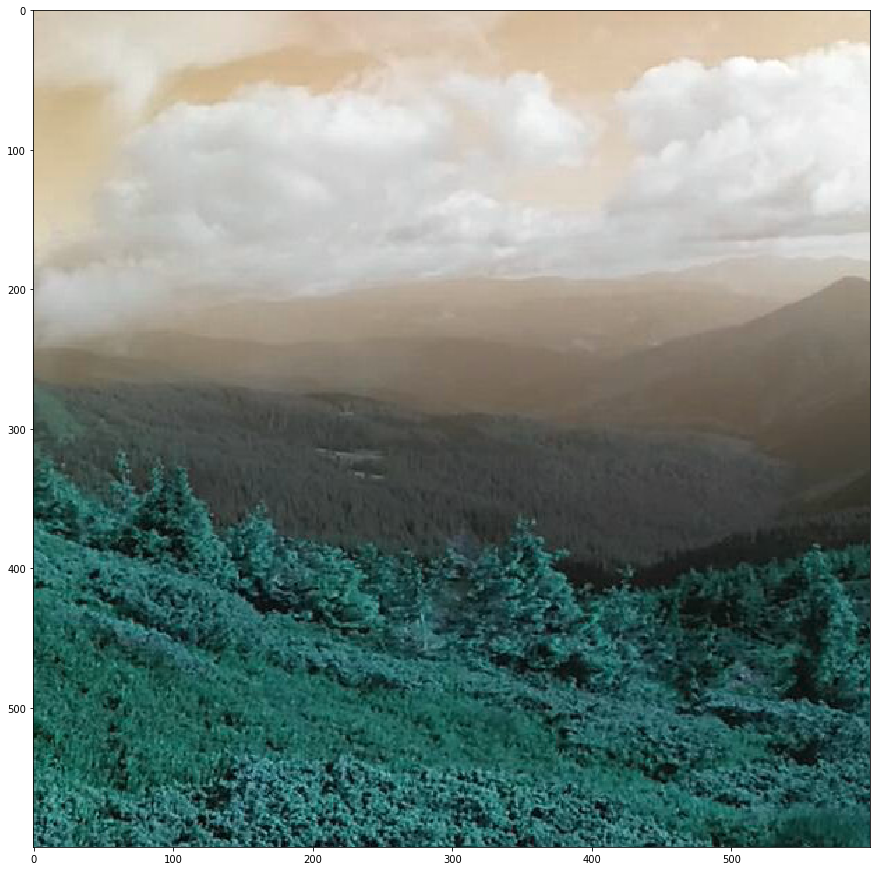

In [1]:
import numpy as np
import cv2
from skimage import io
from matplotlib import pyplot as plt
%matplotlib inline
figsize = (15,22)

def _plot(img):
    plt.figure(figsize=figsize)
    plt.imshow(img)

def url_to_image(url):
  print("downloading %s" % (url))
  return cv2.cvtColor(io.imread(url), cv2.COLOR_BGR2RGB)

url = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/images/view.jpg"
img = url_to_image(url)

(r,c) = img.shape[:2]
pts1 = np.float32([[0,0],[r,0],[0,c]])
pts2 = np.float32([[50,0],[r,50],[0,c-50]])

print(pts1)
print(pts2)
_plot(img)

### Our Implementation

In [2]:
# since OpenCV has very confusing clashes between interfaces and internal matrix representation,
# i.e. in interface we identify point as (horizontal, vertical), while when accesses directly it
# should be (vertival, horizontal). Thus to avoid code magic and possible bugs, we made the 
# convertion from matrix representation to interface form(and vice versa) explicitly
def to_mtx(img):
    H,V,C = img.shape
    mtr = np.zeros((V,H,C), dtype='int')
    for i in range(img.shape[0]):
        mtr[:,i] = img[i]
    
    return mtr

def to_img(mtr):
    V,H,C = mtr.shape
    img = np.zeros((H,V,C), dtype='int')
    for i in range(mtr.shape[0]):
        img[:,i] = mtr[i]
        
    return img

In [3]:
def getAffineTransform(pts1, pts2):
    a = []
    for x,y in pts1:
        a.append((x,y,1))

    return np.linalg.solve(a, pts2).T

In [16]:
def warpAffine(img, M, dsize):
    mtr = to_mtx(img)
    R,C = dsize
    dst = np.zeros((R,C,3))
    for i in range(mtr.shape[0]):
        for j in range(mtr.shape[1]):
            i_dst,j_dst = np.dot(M, [i,j,1]).astype(int)
            if i_dst >= 0 and i_dst < R:
                if j_dst >= 0 and j_dst < C:
                    dst[i_dst,j_dst] = mtr[i,j]
            
    return to_img(dst)

[[ 0.91666667 -0.08333333 50.        ]
 [ 0.08333333  0.91666667  0.        ]]


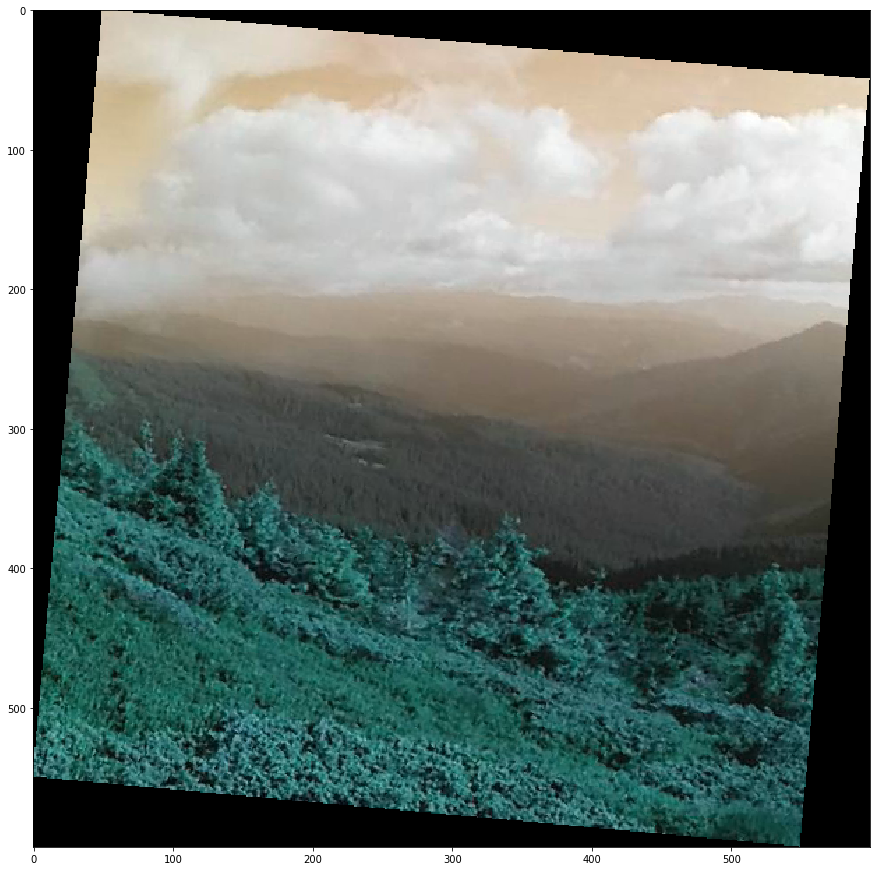

In [17]:
M = getAffineTransform(pts1,pts2)
print(M)
dst = warpAffine(img, M, img.shape[:2])
_plot(dst)

### OpenCV implementation

[[ 0.91666667 -0.08333333 50.        ]
 [ 0.08333333  0.91666667  0.        ]]


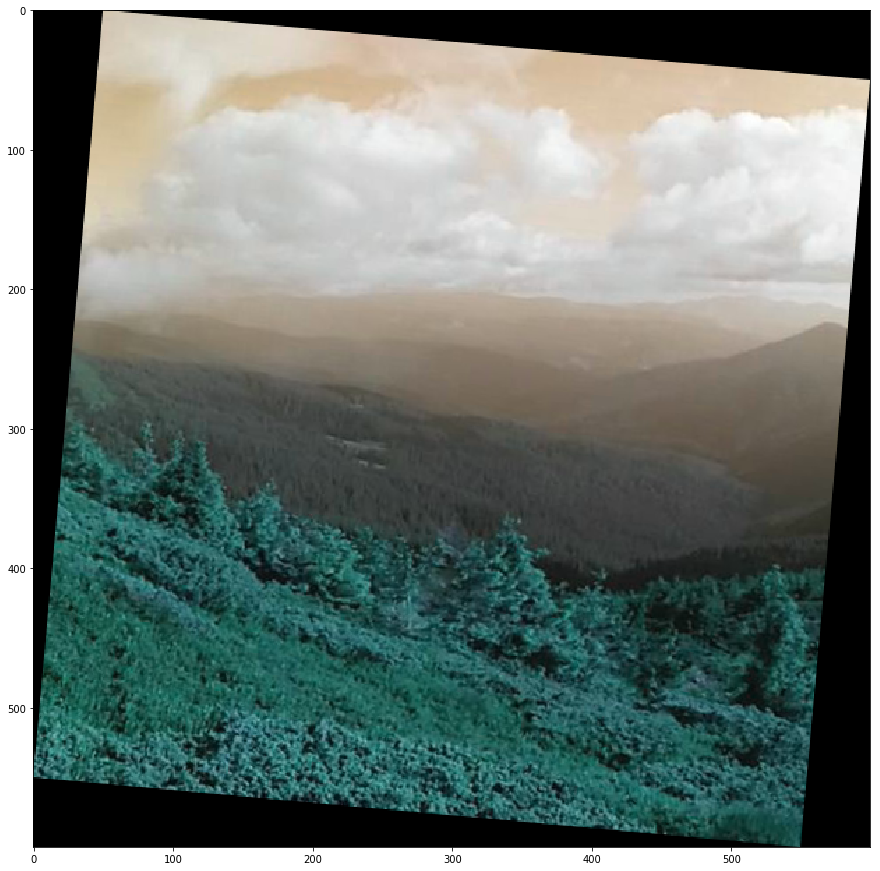

In [6]:
M = cv2.getAffineTransform(pts1,pts2)
print(M)

dst = cv2.warpAffine(img, M, img.shape[:2])
_plot(dst)